# Task 1

A template code for calculating FCFs for $H_2$ - $H_2^+$ using the harmonic oscillator approximation. 

Imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from FCF_helper import FCFSpec

Initialize the `FCFSpec` object. Modify `n_0_max` and `n_p_max` (the maximum vibrational states of $H_2$ and $H_2^+$ that we'll look at calculating FCFs for) in order to get 10 transitions starting from n_0=0.

In [2]:
n_0_max = 0
n_p_max = 10

fcfspec = FCFSpec(n_0_max, n_p_max)

Calculate all the FCFs and print the results.

In [3]:
spectrum = fcfspec.spectrum_analysis()
print("n_0\t\t n_p\t\t FCF\t\t energy_diff")
print(spectrum)

n_0		 n_p		 FCF		 energy_diff
[[0.00000000e+00 0.00000000e+00 1.00000000e+00 1.52970404e+01]
 [0.00000000e+00 1.00000000e+00 2.95139079e+00 1.55849317e+01]
 [0.00000000e+00 2.00000000e+00 3.49048846e+00 1.58728230e+01]
 [0.00000000e+00 3.00000000e+00 2.01446220e+00 1.61607143e+01]
 [0.00000000e+00 4.00000000e+00 5.16711333e-01 1.64486056e+01]
 [0.00000000e+00 5.00000000e+00 2.55047939e-02 1.67364969e+01]
 [0.00000000e+00 6.00000000e+00 8.26500159e-03 1.70243882e+01]
 [0.00000000e+00 7.00000000e+00 1.09734335e-02 1.73122795e+01]
 [0.00000000e+00 8.00000000e+00 1.39346082e-03 1.76001708e+01]
 [0.00000000e+00 9.00000000e+00 8.39894919e-05 1.78880621e+01]
 [0.00000000e+00 1.00000000e+01 2.53763959e-04 1.81759534e+01]]


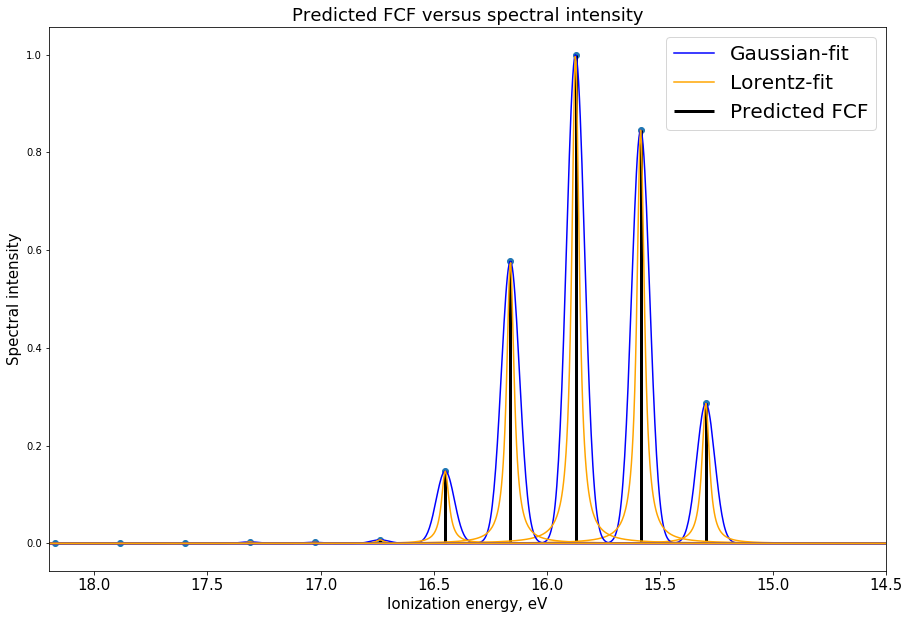

In [19]:
def gauss(x,x0,y0,sigma):
    '''
    The Gaussian function
    y = y0*Exp(-0.5*((x-x0)/sigma)**2)
    
    Parameters:
        x0: The position of the peak
        y0: the intensity of the peak
        sigma: The width of the Gaussian
        
    Returns:
        The gaussian evaluated at x
    
    '''
    
    g = y0*np.exp(-0.5* ((x-x0)/sigma)**2)
    
    return g


def lorentz(x,x0,y0,B):
    '''
    The unormalized lorentz function
    
    y = y0/( ((x-x0)/B)**2  +1 )
    
    
    Parameters:
        x0: The position of the peak
        y0: the intensity of the peak
        B: The width of the Lorentzian curve
        
    Returns:
        The Unormalized lorentzian function evaluated at x
    
    
    '''
    lz = y0/(((x-x0)/B)**2+1.0)
    
    return lz

def min_max_scaler(x,y):
    '''
    A function that scales the y(x) curve so that its maximum is 1 
    and minima is zero
    '''
    
    ymax_curve = np.max(y)
    ymin_curve = np.min(y)
    
    ys = (y-ymin_curve)/(ymax_curve-ymin_curve)
    xs =x
    
    return xs,ys

data = np.genfromtxt('fig2_data.csv',delimiter=',')
x_data = data[:,0]
y_data = data[:,1]

y= spectrum[:,2] #FCF values
x= spectrum[:,3] #energy diff in eV

# scale the data
x,y = min_max_scaler(x,y)
x_data,y_data = min_max_scaler(x_data,y_data)

# Generate a more dense mesh for overlaying the Gaussian curves
xx = np.linspace(14.5,18.2,1000)

# Here we play with some settings for the plot
plt.rc('xtick',labelsize=15)
plt.figure(figsize=(15,10))
plt.scatter(x,y)
#plt.scatter(x_data,y_data)

# Plot the predicted FCF versus spectral intensity 
for k in range(len(x)):
    
    # We only generate a label for the plot once and the rest will be unlabelled
    if(k==0):
        plt.plot(xx,gauss(xx,x[k],y[k], sigma=.04),color='blue',label='Gaussian-fit')
        plt.plot(xx,lorentz(xx,x[k],y[k], B=.02), color='orange',label='Lorentz-fit')  
        plt.vlines(x[k],0.0,y[k],linewidth=3,label='Predicted FCF')
    else:
        plt.plot(xx,gauss(xx,x[k],y[k], sigma=.04),color='blue')
        plt.plot(xx,lorentz(xx,x[k],y[k], B=.02), color='orange') 
        plt.vlines(x[k],0.0,y[k],linewidth=3)

plt.title('Predicted FCF versus spectral intensity',size=18)
plt.xlim(14.5,18.2)
plt.gca().invert_xaxis()
plt.xlabel('Ionization energy, eV', size =15)
plt.ylabel('Spectral intensity',size=15)
plt.legend(prop={'size': 20})
plt.show()